# Tensorlakehouse openEO: Local Connection

Tensorlakehouse openEO client allows users to apply processes on local data (e.g., netCDF, tif files)
Further info: https://openeo.org/documentation/1.0/python/client-side-processing.html#local-collections

### Setup

1. Create a python virtualenv (python 3.11.7 is the recommended version). 
2. Clone the repository:
```
git clone https://github.com/IBM/tensorlakehouse-openeo-driver.git
``` 

3. Go to
```
cd tensorlakehouse-openeo-driver/tutorials
```

4. Install dependencies:
```
pip install -r tutorial_requirements.txt
```

5. Run jupyter notebook or jupyter lab
```
jupyter lab .
```

In [30]:
import os
from pathlib import Path
import openeo
from openeo.local import LocalConnection
import xarray as xr


In [31]:
# create local connection object
path = Path("./test_data/test_openeo_Globalweather-ERA5-.nc")
assert path.exists()
local_conn = LocalConnection("./")
# set collection variable to the path to the file
collection = "test_data/test_openeo_Globalweather-ERA5-.nc"

# describe collection
local_conn.describe_collection(collection)

{'stac_version': '1.0.0-rc.2',
 'type': 'Collection',
 'id': 'test_data/test_openeo_Globalweather-ERA5-.nc',
 'title': 'test_data/test_openeo_Globalweather-ERA5-.nc',
 'description': '',
 'license': '',
 'providers': [{'name': '', 'roles': ['producer'], 'url': ''}],
 'links': '',
 'extent': {'temporal': {'interval': [['2007-01-07T00:00:00.000000000',
     '2007-02-04T00:00:00.000000000']]}},
 'cube:dimensions': {'t': {'type': 'temporal',
   'extent': ['2007-01-07T00:00:00.000000000',
    '2007-02-04T00:00:00.000000000']},
  'x': {'type': 'spatial',
   'axis': 'x',
   'extent': [-3.773696000000001, 0.28953599999999824]},
  'y': {'type': 'spatial',
   'axis': 'y',
   'extent': [52.67187200000001, 56.73510400000001]},
  'bands': {'type': 'bands', 'values': ['Total precipitation']}}}

### Load collection, select the area of interest and compute temporal aggregation

In [32]:

# set bounding box
west = -3.0
east = 0.0
south = 53.0
north = 56.0
# load_collection instantiates the datacube object
datacube = local_conn.load_collection(collection_id=collection)
# select the area of interest
datacube = datacube.filter_bbox(west=west, east=east, south=south, north=north)
# compute temporal aggregation by select t dimension (which is the temporal dimension) and mean as a reducer function 
datacube = datacube.reduce_dimension(reducer="mean", dimension="t")
# call execute() method to run all processes
array = datacube.execute()
array

<xarray.DataArray (bands: 1, y: 23, x: 23)> Size: 4kB
dask.array<mean_agg-aggregate, shape=(1, 23, 23), dtype=float64, chunksize=(1, 23, 23), chunktype=numpy.ndarray>
Coordinates:
  * y            (y) float64 184B 55.95 55.82 55.69 55.56 ... 53.33 53.2 53.07
  * x            (x) float64 184B -2.987 -2.856 -2.725 ... -0.2348 -0.1037
    spatial_ref  int64 8B ...
  * bands        (bands) object 8B 'Total precipitation'
Attributes:
    grid_type:                      pairs
    resolution_level:               12
    reduced_dimensions_min_values:  {'t': numpy.datetime64('2007-01-07T00:00:...

### Plotting the result

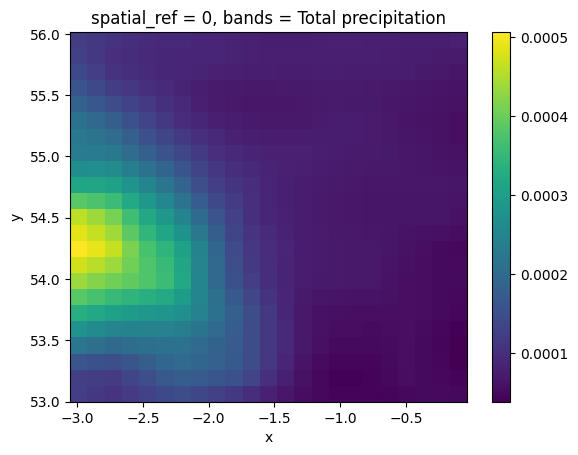

In [33]:
array.isel(bands=0).plot()

In [34]:
local_conn = LocalConnection("/")
# set collection variable to the path to the file
collection = "/home/romeokienzler/Downloads/s1cogs/S1A_IW_GRDH_1SDV_20220101T090715_20220101T090740_041265_04E78F_73F0_VH.tiff"

# describe collection
local_conn.describe_collection(collection)


{'stac_version': '1.0.0-rc.2',
 'type': 'Collection',
 'id': '/home/romeokienzler/Downloads/s1cogs/S1A_IW_GRDH_1SDV_20220101T090715_20220101T090740_041265_04E78F_73F0_VH.tiff',
 'title': '/home/romeokienzler/Downloads/s1cogs/S1A_IW_GRDH_1SDV_20220101T090715_20220101T090740_041265_04E78F_73F0_VH.tiff',
 'description': '',
 'license': '',
 'providers': [{'name': '', 'roles': ['producer'], 'url': ''}],
 'links': '',
 'extent': {'spatial': {'bbox': [[-6.307796460110961,
     -53.128447512491896,
     -4.29404308770023,
     -50.52225521020434]]}},
 'cube:dimensions': {'x': {'type': 'spatial',
   'axis': 'x',
   'extent': [-53.128447512491896, -50.52225521020434],
   'reference_system': 'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'},
  'y': {'type': 'spatial',
   'axis': 'y',
   'extent': [-6.307796460110961, -4.29404308770023],
   'reference_system': 'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'},
  'bands': {'type': 'bands', 'values': ['band_1']}}}

In [35]:
datacube = local_conn.load_collection(collection_id=collection)
datacube

In [36]:
da = datacube.execute()
da

<xarray.DataArray (bands: 1, y: 22418, x: 29013)> Size: 3GB
dask.array<stack, shape=(1, 22418, 29013), dtype=float32, chunksize=(1, 22418, 29013), chunktype=numpy.ndarray>
Coordinates:
  * x            (x) float64 232kB -53.13 -53.13 -53.13 ... -50.52 -50.52 -50.52
  * y            (y) float64 179kB -4.294 -4.294 -4.294 ... -6.308 -6.308 -6.308
    spatial_ref  int64 8B 0
  * bands        (bands) object 8B 'band_1'
Attributes:
    AREA_OR_POINT:  Area
    Band_1:         Gamma0_VH

In [37]:
da[0,0,0]

<xarray.DataArray ()> Size: 4B
dask.array<getitem, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    x            float64 8B -53.13
    y            float64 8B -4.294
    spatial_ref  int64 8B 0
    bands        <U6 24B 'band_1'
Attributes:
    AREA_OR_POINT:  Area
    Band_1:         Gamma0_VH

In [38]:
da[0,22418-1,29013-1]

<xarray.DataArray ()> Size: 4B
dask.array<getitem, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    x            float64 8B -50.52
    y            float64 8B -6.308
    spatial_ref  int64 8B 0
    bands        <U6 24B 'band_1'
Attributes:
    AREA_OR_POINT:  Area
    Band_1:         Gamma0_VH